In [140]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

%matplotlib inline

data = np.genfromtxt("takashin_Homework_sample.csv", dtype=float, delimiter=',', names=True)
timestamp = data['timesecond']
scaler = preprocessing.MinMaxScaler()

# normazile data
IR = scaler.fit_transform(data['IR'])
RED = scaler.fit_transform(data['RED'])

# butter filter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog = False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def caculateRate(timestamp, data, thres, min_dist, fs):
    peakind = peakutils.indexes(data, thres=0.2, min_dist=25)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    rate = np.zeros(numberOfPeak - 1)
    for i in range(1, numberOfPeak):
        interval =  timestamp[peakind[i]]  - timestamp[peakind[i-1]] 
        rate[i-1] =  60 / interval
    return rate

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

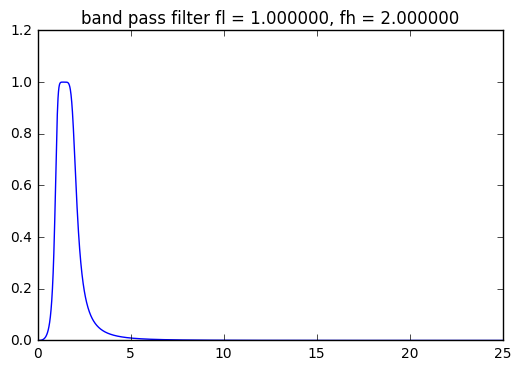

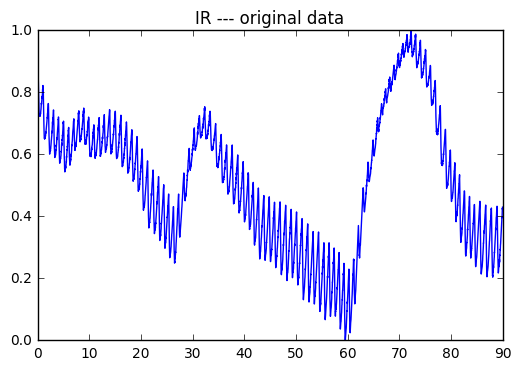

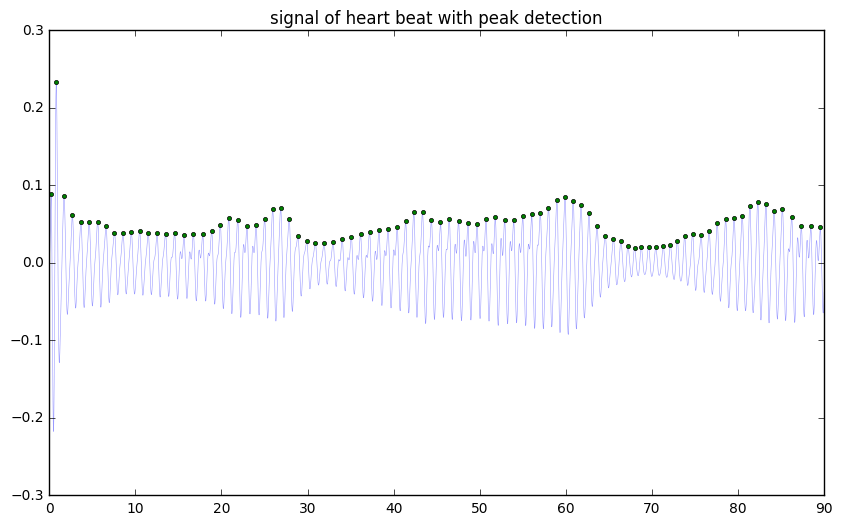

In [52]:
fs = 50.0
lowcut = 1
highcut = 2
order = 3
data = IR
time = timestamp
thres=0.2
min_dist=25 
# lowcut = 1/6.0
# highcut = 1/3.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR --- original data")
pyplot.figure(figsize=(10,6))
index = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[index],y[index], marker="o", ls="", ms=3 )
plt.title("signal of heart beat with peak detection")

In [53]:
heartRate = caculateRate(time, y, thres,min_dist,fs)
print "the average heart rate is %f"% (np.sum(heartRate)/len(heartRate))
print "the real time heart rate is: \n"
print heartRate

number of peak 92
the average heart rate is 61.713855
the real time heart rate is: 

[ 100.           66.66666667   61.2244898    61.2244898    62.5
   61.2244898    61.2244898    61.2244898    60.           62.5          62.5
   60.           58.82352941   60.           57.69230769   54.54545455
   55.55555556   55.55555556   57.69230769   58.82352941   62.5
   56.60377358   56.60377358   56.60377358   60.           63.82978723
   65.2173913    61.2244898    58.82352941   58.82352941   60.
   58.82352941   57.69230769   56.60377358   56.60377358   55.55555556
   57.69230769   54.54545455   56.60377358   57.69230769   60.
   63.82978723   58.82352941   58.82352941   56.60377358   58.82352941
   55.55555556   54.54545455   56.60377358   58.82352941   55.55555556
   54.54545455   57.69230769   57.69230769   57.69230769   58.82352941
   63.82978723   61.2244898    63.82978723   63.82978723   65.2173913
   65.2173913    63.82978723   62.5          63.82978723   68.18181818
   73.17073171  

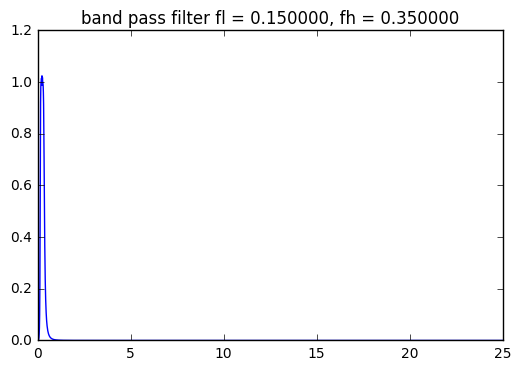

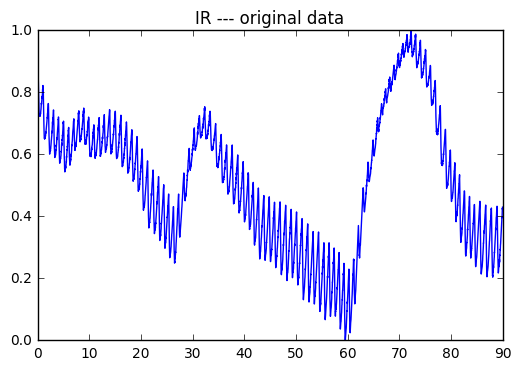

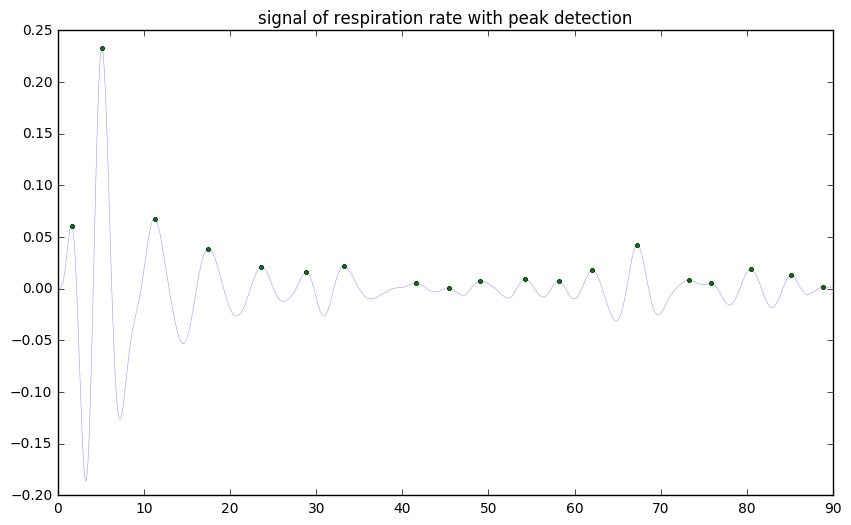

In [73]:
fs = 50.0
lowcut = 0.15
highcut = 0.35
order = 4
data = IR
time = timestamp
thres= 0.01
min_dist = 100


# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR --- original data")
pyplot.figure(figsize=(10,6))
index = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[index],y[index], marker="o", ls="", ms=3 )
plt.title("signal of respiration rate with peak detection")

In [77]:
respiration = caculateRate(time, y, thres,min_dist,fs)
# filter abnormal result
result = [x for x in respiration if x <= 20 and x >= 10]
print "the average respiration  rate is %f"% (np.sum(result)/len(result))
print "the real time respiration rate is: \n"
print result

number of peak 21
the average respiration  rate is 13.861074
the real time respiration rate is: 

[17.045454545454547, 11.494252873563221, 13.761467889908259, 15.38461538461539, 16.759776536312824, 11.538461538461547, 15.306122448979584, 15.306122448979584, 11.494252873563221, 10.033444816053505, 12.820512820512802, 12.765957446808503, 16.483516483516546]


# Calculate SPO2 

## IR signal

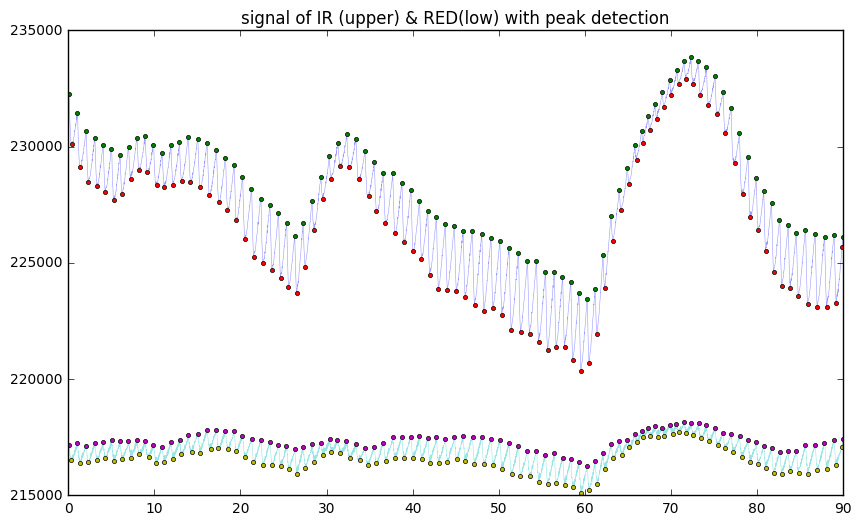

In [205]:
IROrgin = data['IR']
REDOrgin = data['RED']

time = timestamp
thres=0.05
min_dist=30
pyplot.figure(figsize=(10,6))
# the index of "postive" peak for IR signal
indexPositiveIR = peakutils.indexes(IROrgin, thres, min_dist)
# the index of "negative" peak for IR signal
indexNegativeIR = peakutils.indexes(-1*IROrgin, thres, min_dist)
# the index of "postive" peak for RED signal
indexPositiveRED = peakutils.indexes(REDOrgin, thres, min_dist)
# the index of "negative" peak for RED signal
indexNegativeRED = peakutils.indexes(-1*REDOrgin, thres, min_dist)
# we find the 15th negative peak will be wrong tagged for "RED" signal
# so we manually remove this point from our indexNegativeRED tuple using following code
indexNegativeRED = list(indexNegativeRED)
del indexNegativeRED[14]
plt.plot(time, IROrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveIR],IROrgin[indexPositiveIR], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeIR],IROrgin[indexNegativeIR], marker="o", ls="", ms=3 )
plt.plot(time, REDOrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveRED],REDOrgin[indexPositiveRED], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeRED],REDOrgin[indexNegativeRED], marker="o", ls="", ms=3 )
plt.title("signal of IR (upper) & RED(low) with peak detection")

In [211]:
ACIR = abs(IROrgin[indexPositiveIR] - IROrgin[indexNegativeIR])
ACRED = abs(REDOrgin[indexPositiveRED] - IROrgin[indexNegativeRED])

# DCIR = IROrgin[indexNegativeIR]
# DCRED = REDOrgin[indexNegativeRED]
DCIR = sum(IROrgin)/len(IROrgin)
DCRED = sum(REDOrgin)/len(REDOrgin)
ratioAverage = (ACRED * DCIR) * 1.0/(ACIR * DCRED)
ratioAverage = 1.0/ratioAverage
-45.060*ratioAverage* ratioAverage + 30.354 *ratioAverage + 94.845 

array([ 98.51518019,  98.93695778,  98.90687092,  98.82969401,
        98.82508844,  99.14398401,  98.32125851,  97.72882377,
        97.65072082,  98.00188667,  98.30843823,  97.89594243,
        98.29684491,  98.17667635,  98.64550827,  98.92976181,
        99.22719278,  99.26841908,  99.38931219,  99.62585962,
        99.8939082 ,  99.94610958,  99.95284879,  99.94115596,
        99.93804427,  99.83472505,  99.95293753,  99.45442865,
        97.91583319,  97.11196796,  97.05237247,  96.96311914,
        97.69340228,  98.25218755,  98.68949022,  99.08393986,
        99.29565303,  99.80535527,  99.85212965,  99.93283487,
        99.91799994,  99.91781192,  99.30849784,  99.63530119,
        99.5740526 ,  99.33419527,  98.28018152,  97.35203802,
        98.70223349,  97.840168  ,  94.99358253,  95.34849087,
        96.83532101,  94.05023017,  93.95081211,  95.11786279,
        97.02431249,  92.45275324,  89.90353414,  97.00239732,
        99.95675609,  98.97359273,  97.72468362,  96.98